<a href="https://colab.research.google.com/github/mikemenj/mikemenj/blob/main/Part_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Evaluate the performance of your model based on r^2.
- Evaluate the performance of your model based on rmse.
2. Your second task is to build a regression tree model to predict sales.

- Build a simple regression tree model.
- Compare the performance of your model based on r^2.
- Compare the performance of your model based on rmse.
3. You now have tried 2 different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?
- Justify your recommendation.
4. To finalize this project, complete a README in your GitHub repository including:

- An overview of the project
- 2 relevant insights from the data (supported with reporting quality visualizations)
- Summary of the model and its evaluation metrics
- Final recommendations 

#Imports

In [38]:
## Pandas
import pandas as pd

## Numpy
import numpy as np

## MatPlotLib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config

## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

#Read the Data

In [39]:
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSluepdRgArMMr7UNy-EQUgZqemlRAe_19THlveO6kkh4nUtJ-ukHy2qvE5aYhj3L6YkOPMJc8Go_oz/pub?gid=1284655454&single=true&output=csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Check Duplicates

In [41]:
df.duplicated().sum()

0

#Check Inconsistancies



##Break into number and object columns

In [42]:
#instantiate selectors for numberic and categorical data
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

#select the columns of each type
num_columns = num_selector(df)
cat_columns = cat_selector(df)

#check lists
print('numeric columns are', num_columns)
print('categorical columns are all nominal', cat_columns)

numeric columns are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
categorical columns are all nominal ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


##Check value counts on number columns

In [43]:
for col in num_columns:
  print(f'{col} Value Counts:')
  print(df[col].value_counts(dropna = False))
  print('\n\n')

Item_Weight Value Counts:
NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64



Item_Visibility Value Counts:
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



Item_MRP Value Counts:
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64



Outlet_Establishment_Year Value Counts:
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64



Item_Outlet_Sales Value Counts:
958.7520     17
1342.2528    16
703.0848 

##Check description of numeric columns

In [44]:
df[num_columns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Check for Missing Values on numeric columns

In [45]:
df[num_columns].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [46]:
Item_Weight_missing = df['Item_Weight'].isna().sum()
print(f'Item Weight has {Item_Weight_missing} missing values')

Item Weight has 1463 missing values


##Check value counts on categorical columns

In [47]:
for col in cat_columns:
  print(f'{col} Value Counts:')
  print(df[col].value_counts(dropna = False))
  print('\n\n')

Item_Identifier Value Counts:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content Value Counts:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type Value Counts:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier Value Counts:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035   

##Check Missing Values on categorical columns

In [65]:
df[cat_columns].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [49]:
Outlet_Size_missing = df['Outlet_Size'].isna().sum()
print(f'Outlet_Size has {Outlet_Size_missing} missing values')

Outlet_Size has 2410 missing values


#Split

In [50]:
target = 'Item_Outlet_Sales'
other_columns = 'Item_Identifier'
X = df.drop(columns = [target,other_columns])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Imputers, OHE, Scaler

In [51]:
# Imputers
mean_imputer = SimpleImputer(strategy='mean') #mean strategy for numeric cols
freq_imputer = SimpleImputer(strategy='most_frequent') #most frequent for cat cols

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Scaler
scaler = StandardScaler() #scaler for numeric columns

#Numeric Pipeline

In [52]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

#Categorial Pipeline

In [53]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#Tuples and Column Transformer

In [54]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a670fc160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a670fc100>)])

#Fit Model

In [55]:
linReg_pipe = make_pipeline(preprocessor, LinearRegression())
linReg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a670fc160>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a670fc100>)])),
                ('linearregression', LinearRegression())])

#Predictions

In [56]:
predictions = linReg_pipe.predict(X_test)

In [57]:
prediction_df = X_test.copy()
prediction_df[target] = y_test
prediction_df[f'Predicted {target}'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predicted Item_Outlet_Sales,Error
7503,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644,1362.0,-381.0644
2957,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1,356.8688,722.0,365.1312
7031,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1,377.5086,885.0,507.4914
1084,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782,4237.5,-1540.9782
856,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1,2356.9320,3345.5,988.5680


#Model Metrics Function

In [58]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

  ## Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  ## Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

In [59]:
## Display the Model's metrics
model_metrics(linReg_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Linear Regression Model')

Linear Regression Model Train Scores
MAE: 847.0817 
MSE: 1297216.3309 
RMSE: 1138.9541 
R2: 0.5616706

Linear Regression Model Test Scores
MAE: 804.1168 
MSE: 1194640.9114 
RMSE: 1092.9963 
R2: 0.5669986



In [61]:
df2 = df.dropna(subset = ['Item_Weight', ''])

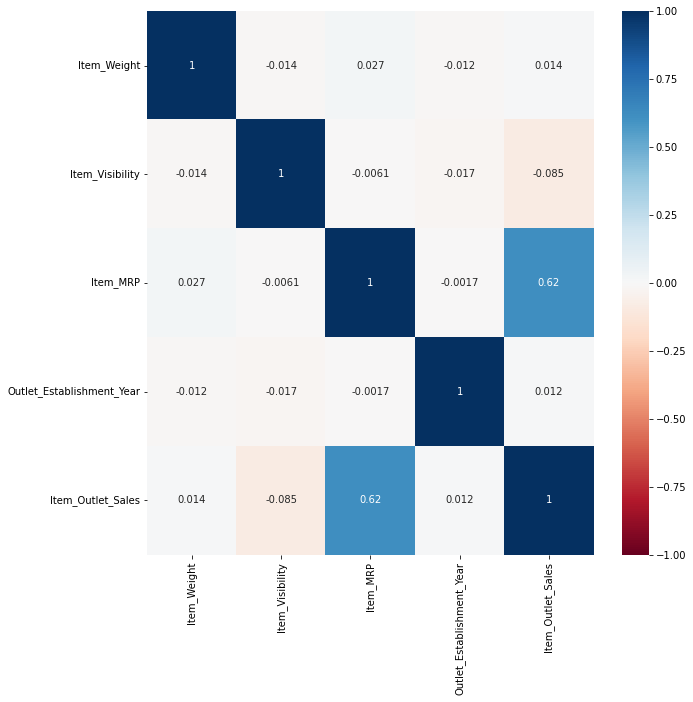

In [64]:
corr = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot = True);